
# Tinkoff sirius ML 2023 RecSys intro task (EDA)

### Бибилиотеки и данные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Включим сетку в графиках
plt.rc('axes', grid=True)

In [2]:
data_folder = 'kion_data/'

items_df = pd.read_csv(data_folder + 'items.csv')
interactions_df = pd.read_csv(data_folder + 'train_data.csv')
users_df = pd.read_csv(data_folder + 'users.csv')

## EDA

### Пользователи

In [3]:
users_df.sample(3)

,user_id,age,income,sex,kids_flg
53061,437802,age_65_inf,income_20_40,Ж,0
43321,632932,age_55_64,income_20_40,Ж,0
88819,659883,age_35_44,income_20_40,М,0


In [4]:
print(f'Общее количество пользователей: {len(users_df):,}')

Общее количество пользователей: 366,088


1. `user_id` – индентификатор пользователя, уникален для каждого
2. `age` – категориальный признак, показывающий возрастную группу пользователя
3. `income` – категориальный признак, показывающий зарплатную группу пользователя
4. `sex` – пол пользователя
5. `kids_flg` – наличие детей у пользователя

Для каждой колонки посмотрим все количество принимаемых значений, количество пропусков, типы.

In [5]:
print('Количество уникальных значений в данных:', '\n\n', users_df.nunique(), sep='')

Количество уникальных значений в данных:

user_id     366088
age              6
income           6
sex              2
kids_flg         2
dtype: int64


In [6]:
print('Количество пропусков в данных:', '\n\n', users_df.isna().sum(), sep='')

Количество пропусков в данных:

user_id        0
age         3582
income      3349
sex         4061
kids_flg       0
dtype: int64


In [7]:
print('Типы данных:', '\n\n', users_df.dtypes, sep='')

Типы данных:

user_id      int64
age         object
income      object
sex         object
kids_flg     int64
dtype: object


Переведем признаки `age`, `income`, `sex`, к категориальному типу. `kids_flg` к `bool` так как там нет пропусков.


In [8]:
for col in ['income', 'age', 'sex']:
  users_df[col] = users_df[col].astype('category')

users_df['kids_flg'] = users_df['kids_flg'].astype(bool)


Имеет смысл посмотреть на **barplot**.

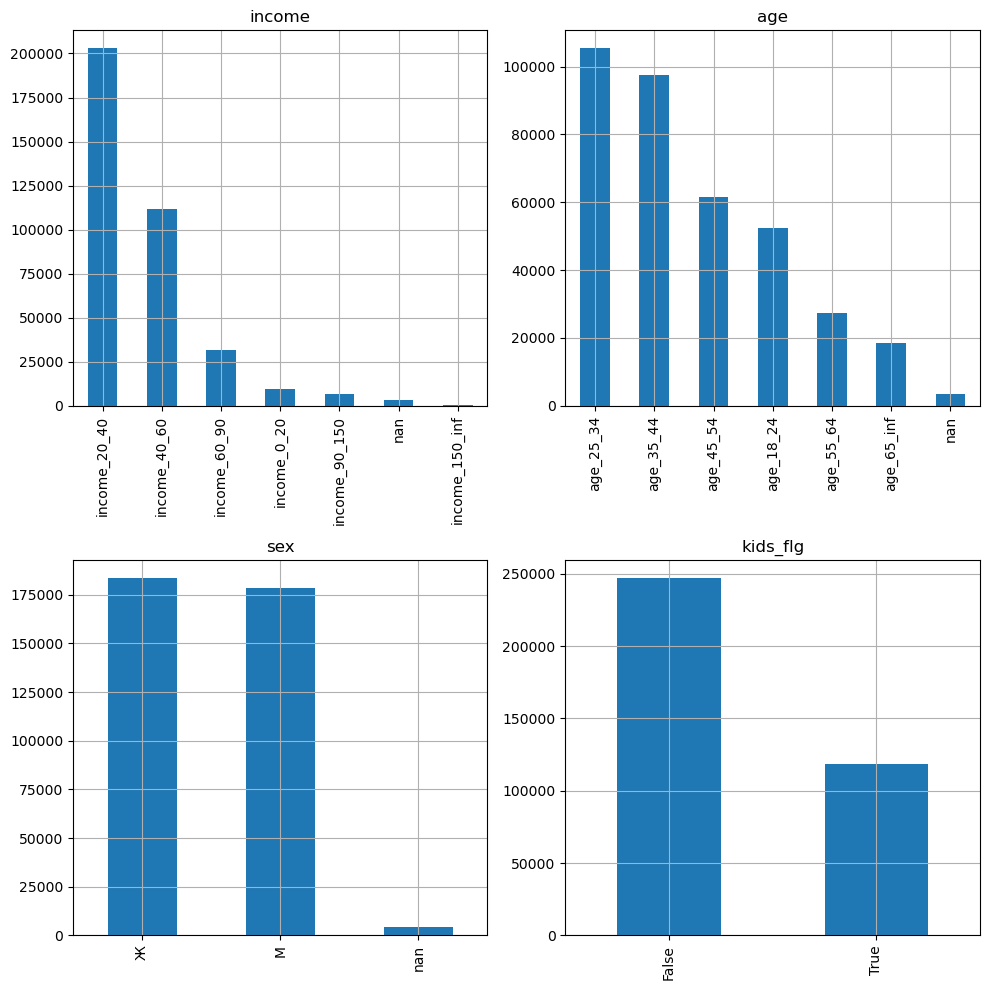

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for num, col in enumerate(['income', 'age', 'sex', 'kids_flg'], start=0):
  row = num // 2
  col_num = num % 2
  category_counts = users_df[col].value_counts(dropna=False)
  category_counts.plot(kind='bar', ax=axes[row, col_num])
  axes[row, col_num].set_title(col)


plt.tight_layout()
plt.show()

Достаточно равномерное распределение пола, что нельзя сказать о доходах и возрасте.

### Фильмы

In [10]:
items_df.sample(5)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
5866,15051,film,Порочная связь,Lacci,2020.0,драмы,"Италия, Франция",NaN,18.0,NaN,Даниэле Лукетти,"Альба Рорвахер, Луиджи Ло Кашио, Лаура Моранте...","Когда Альдо и Ванда были молодыми, их жизнь на...","кризис брака, 2020, италия, франция, порочная,..."
2917,2611,film,Захочу и соскочу. Супергерои,Smetto quando voglio: Ad honorem,2017.0,"боевики, комедии",Италия,NaN,16.0,NaN,Сидней Сибилиа,"Эдоардо Лео, Валерио Эпри, Паоло Калабрези, Ли...",Пьетро Дзинни в тюрьме за производство легальн...,"университет, нелегальные наркотики, , Газ, Инж..."
1915,14861,film,Красотка на всю голову,I Feel Pretty,2018.0,"мелодрамы, комедии","Китай, США",NaN,16.0,NaN,"Эбби Кон, Марк Силверштейн","Эми Шумер, Мишель Уильямс, Том Хоппер, Рори Ск...",Ее жизнь состояла из вечных попыток сесть на д...,"уверенность, заблуждение, черепно-мозговая тра..."
7294,1677,film,Носферату. Ужас ночи,Nosferatu. Uzhas nochi,2010.0,"ужасы, мультфильм, детективы, комедии",Россия,NaN,16.0,NaN,Владимир Мариничев,"Владимир Мариничев, Михаил Хрусталёв, Анатолий...",Молодой клерк Джонатан отправляется за тридевя...,"2010, россия, носферату, ужас, ночи"
7593,10745,series,Слабая женщина,NaN,2014.0,"русские, мелодрамы",Россия,NaN,12.0,NaN,Всеволод Аравин,"Александр Багрянцев, Александр Хващинский, Ана...","Люся замечательная хозяйка, образцовая жена, п...","Слабая, женщина, 2014, Россия, брак, жизнь, лю..."


In [11]:
print(f'Общее количество фильмов: {len(items_df):,}')

Общее количество фильмов: 12,067


1. `item_id` – индентификатор айтема, уникален для каждого
2. `content_type` – категориальный признак, тип айтема (фильм, сериал и т.д.)
3. `title` – Название на русском языке
4. `title_orig` – Название на языке оригинала
5. `release_year` – год выхода
6. `genres` – список жанров (представлен строкой)
7. `countries` – страна издания
8. `for_kids` – предназначен для детей
9. `age_rating` – возрастной рейтинг картины
10. `studios` – студия, выпустившая картину
11. `directors` – режиссер(ы)
12. `actors` – актёры
13. `description` – описание (на русском)
14. `keywords` – ключевые слова, описывающие картину

Для каждой колонки посмотрим все количество принимаемых значений, количество пропусков, типы.

In [12]:
print('Типы данных:', '\n\n', items_df.dtypes, sep='')

Типы данных:

item_id           int64
content_type     object
title            object
title_orig       object
release_year    float64
genres           object
countries        object
for_kids        float64
age_rating      float64
studios          object
directors        object
actors           object
description      object
keywords         object
dtype: object


In [13]:
print('Количество уникальных значений в данных:', '\n\n', items_df.nunique(), sep='')

Количество уникальных значений в данных:

item_id         12067
content_type        2
title           11621
title_orig       8675
release_year      102
genres           2312
countries         636
for_kids            2
age_rating          6
studios            37
directors        6576
actors          10039
description     11819
keywords        11663
dtype: int64


In [14]:
print('Количество пропусков в данных:', '\n\n',  items_df.isna().sum(), sep='')

Количество пропусков в данных:

item_id             0
content_type        0
title               0
title_orig       2923
release_year       48
genres              0
countries          16
for_kids        11539
age_rating          1
studios         11318
directors         907
actors           1799
description         1
keywords          362
dtype: int64


Признак `for_kids` кажется почти бесполезным, а вот про `title_orig` появляется препдоположение, что у фильмов страны СНГ  `title_orig` отсутсвует, так как он может совдать с `title`.

In [15]:
items_df[['countries', 'title', 'title_orig']][items_df['title_orig'].isna()]['countries'].value_counts()

Россия                                                       1903
СССР                                                          442
Украина                                                       125
США                                                            78
Великобритания                                                 66
Республика Корея                                               46
Казахстан                                                      39
Франция                                                        28
Испания                                                        16
Китай                                                          15
Канада                                                         14
Индия                                                          14
Киргизия                                                       12
Беларусь                                                        9
Турция                                                          9
Япония    

Предположение оказалось верным отчасти. Давайте заменим для стран снг **nan** в `title_orig` на `title`.

In [16]:
CIS_countries = ['Россия', 'СССР', 'Украина', 'Беларусь', 'Россия, Украина']

for country in CIS_countries:
  condition = (items_df['title_orig'].isna()) & (items_df['countries'] == country)
  items_df.loc[condition, 'title_orig'] = items_df.loc[condition, 'title']

In [17]:
print('Количество пропусков теперь:', items_df['title_orig'].isna().sum())

Количество пропусков теперь: 440


In [18]:
print(f'Уменьшили количество пропусков в {round(2923/440, 1)} раз.')

Уменьшили количество пропусков в 6.6 раз.


Переведем признаки `content_type`, `release_year`, `for_kids`, `age_rating`, `studios`, `directors` к категориальным.

In [19]:
items_category_col = ['content_type', 'release_year', 'for_kids',
                      'age_rating', 'studios', 'directors', 'genres']

for col in items_category_col:
  items_df[col] = items_df[col].astype('category')

Как было видно выше, `age_rating`, `release_year`, `for_kids` отображаются с точками. Исправим это для лучшей читаемости.



In [20]:
for col in ['age_rating', 'release_year', 'for_kids']:
  items_df[col] = items_df[col].apply(lambda x: int(x) if x != np.nan else np.nan)

Для каждой колонки посмотрим все количество принимаемых значений и наличие пропусков.

Посмотрим на распределения `content_type`, `for_kids`, `age_rating`. Так как в некоторых фичах много пропусков имеет смысл построить графики с **nan** значениями и без.

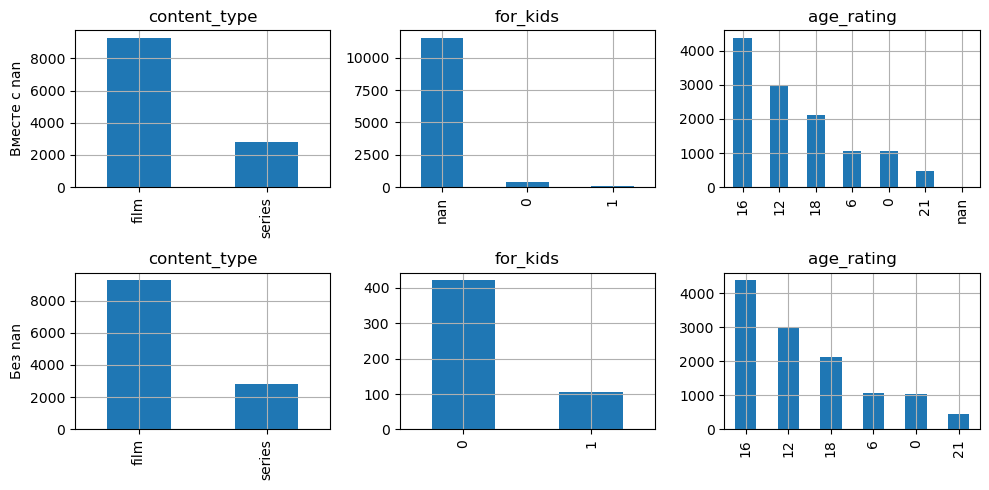

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for num, col in enumerate(['content_type', 'for_kids', 'age_rating']):
  for row in range(2):
    ax = axes[row, num]
    category_counts = items_df[col].value_counts(dropna=row)
    category_counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    if row and num == 0:
      ax.set_ylabel('Без nan')
    elif not row and num == 0:
      ax.set_ylabel('Вместе с nan')

plt.tight_layout()
plt.show()

`for_kids` дублируется с `age_rating` - его можно исправить.

In [22]:
for_kids_age_ratings = items_df[['for_kids', 'age_rating']]\
        .query('for_kids == 1')['age_rating']\
        .unique().to_list()

print(f'age_rating при котором фильм предназначен для детей: {for_kids_age_ratings}.')

age_rating при котором фильм предназначен для детей: [0, 6, 12].


In [23]:
for rating in for_kids_age_ratings:
  condition_for_kids = (items_df['for_kids'].isna()) & (items_df['age_rating'] == rating)
  items_df.loc[condition_for_kids, 'for_kids'] = 1

condition_not_for_kids = (items_df['for_kids'].isna()) & (items_df['age_rating'] != np.nan)
items_df.loc[condition_not_for_kids, 'for_kids'] = 0

print('Количество пропусков после преобоазвания:', items_df['for_kids'].isna().sum())

Количество пропусков после преобоазвания: 0


'Посмотрим на `release_year`, `genres`, `countries`, `studios`, `directors`.

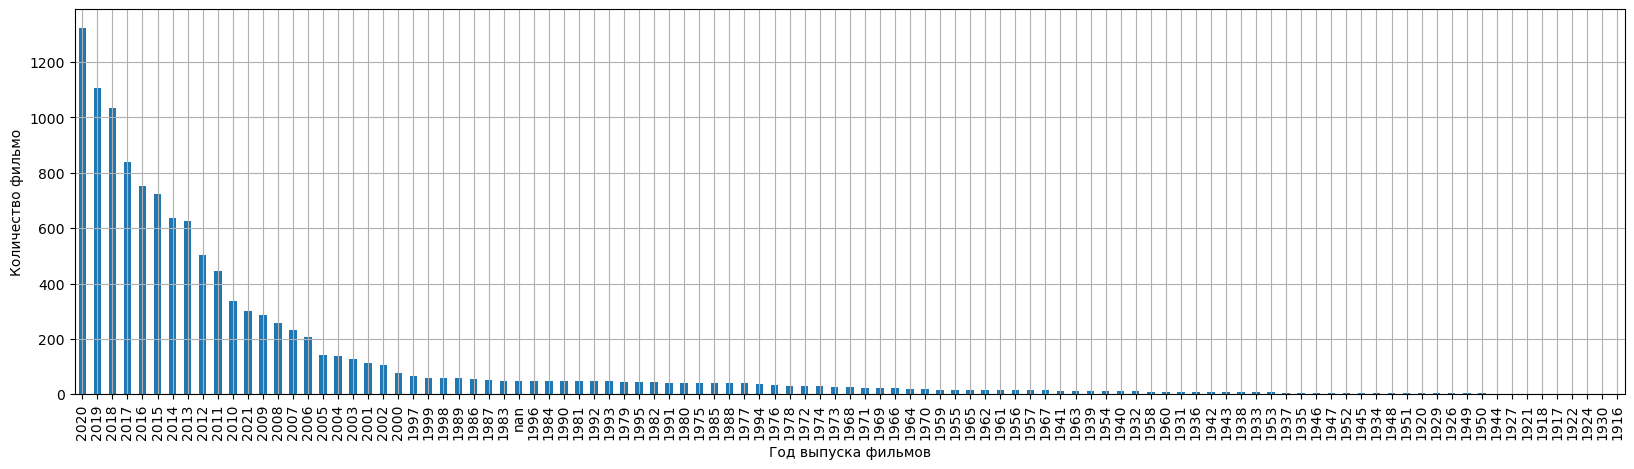

In [24]:
items_df['release_year'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar', figsize=(20, 5))
plt.xlabel('Год выпуска фильмов')
plt.ylabel('Количество фильмо')
plt.show()

Можно предположить, что мы работает с данными за начало 2021 года, так как наблюдается общая тендеция к увеличению количества фильмов с годом (за последние 20 лет).

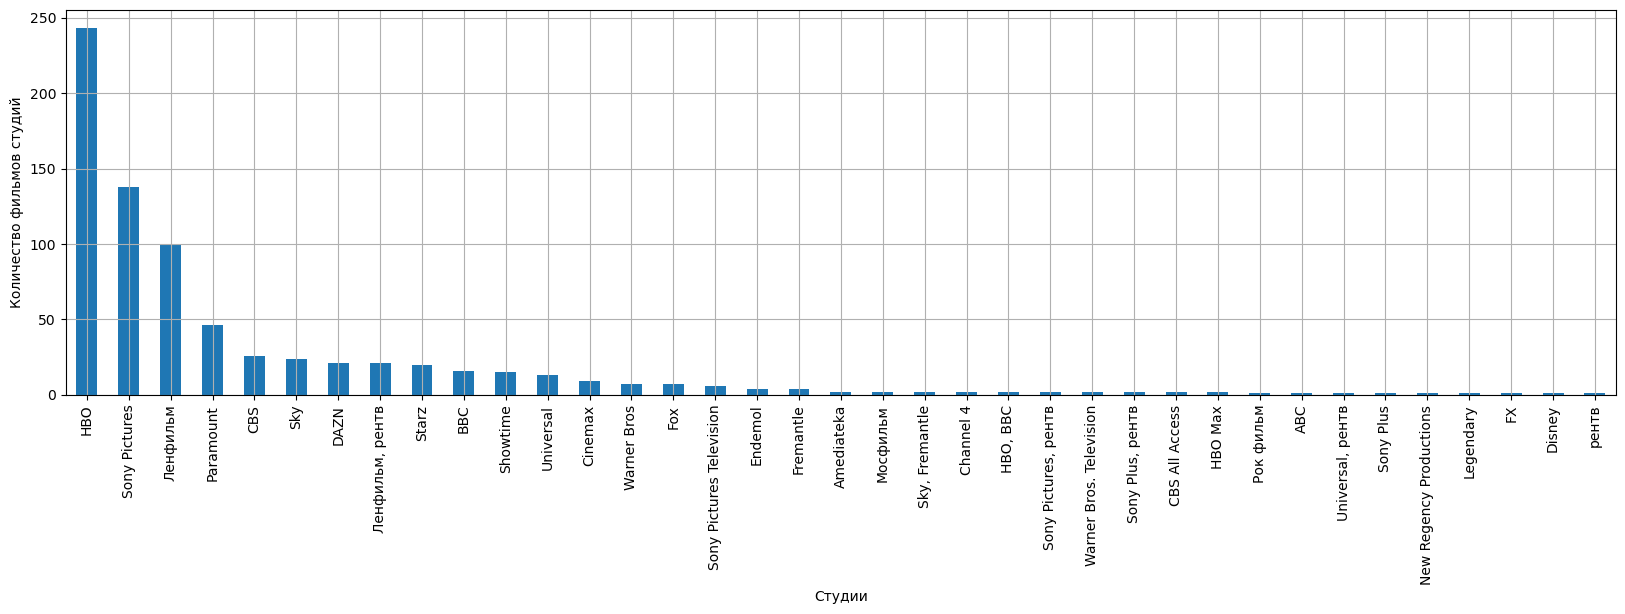

In [25]:
items_df['studios'].value_counts(dropna=True).plot(kind='bar', figsize=(20, 5))
plt.xlabel('Студии')
plt.ylabel('Количество фильмов студий')
plt.show()

In [26]:
items_df['genres'].value_counts()[:15]

документальное               651
драмы                        599
комедии                      480
для взрослых                 460
русские, мелодрамы           231
мелодрамы, комедии           229
драмы, комедии               207
драмы, мелодрамы             190
мелодрамы                    185
фитнес                       165
драмы, мелодрамы, комедии    143
драмы, триллеры              124
no_genre                      89
зарубежные, комедии           89
драмы, зарубежные             86
Name: genres, dtype: int64

In [27]:
items_df.loc[items_df['genres'] == 'no_genre', 'genres'] = np.nan

In [28]:
items_df['countries'].value_counts()[:15]

США                    3370
Россия                 3007
Франция                 928
СССР                    712
Великобритания          577
Италия                  200
Республика Корея        193
Украина                 192
Канада                  181
Испания                 157
Германия                153
Швеция                  121
Великобритания, США     110
Япония                   96
Австралия                87
Name: countries, dtype: int64

In [29]:
items_df['directors'].value_counts()[:15]

Оливье Шиабоду         402
Денис Франческо         49
Глова Роман Юрьевич     36
Бад Фокс                27
Сергей Зарев            26
Стивен Спилберг         24
Бернар Геррини          22
Альфред Хичкок          22
Отто Бауэр              18
Артур Меркулов          18
Уве Болл                16
Роберт Земекис          16
Ридли Скотт             16
Ларс фон Триер          15
Леонид Гайдай           14
Name: directors, dtype: int64

### Взаимодействия

In [30]:
interactions_df.sample(5)

,user_id,item_id,last_watch_dt,total_dur,watched_pct
1145283,935786,9444,2021-04-27,128.0,2.0
1036470,1092906,14317,2021-07-27,5548.0,86.0
808923,464651,5490,2021-06-26,8585.0,100.0
674275,422749,15997,2021-03-14,8165.0,100.0
262109,1011258,8132,2021-04-12,368.0,42.0


In [31]:
print(f'Количество просмотров: {len(interactions_df):,}')

Количество просмотров: 1,224,560


Все так же как и выше: типы, пропуски.

In [32]:
interactions_df.dtypes

user_id            int64
item_id            int64
last_watch_dt     object
total_dur        float64
watched_pct      float64
dtype: object

In [33]:
interactions_df.nunique()

user_id          459099
item_id           12067
last_watch_dt       141
total_dur         73361
watched_pct         101
dtype: int64

In [34]:
interactions_df.isna().sum()

user_id            0
item_id            0
last_watch_dt      0
total_dur          0
watched_pct      265
dtype: int64

In [35]:
known_users = set(interactions_df['user_id']) & set(users_df['user_id'])
unknown_users = set(interactions_df['user_id']) - set(users_df['user_id'])

print(f'Количество пользователей, про которых у нас есть информация: {len(known_users):,}')
print(f'Количество пользователей, про которых мы ничего не знаем: {len(unknown_users):,}')

Количество пользователей, про которых у нас есть информация: 366,088
Количество пользователей, про которых мы ничего не знаем: 93,011


In [36]:
percents_unknows_users_interactions = \
  round(len(interactions_df.loc[list(unknown_users), :]) / len(interactions_df) * 100, 2)

print(f'Пролцент взаимодействий неизвестных пользователей: {percents_unknows_users_interactions}%.')

Пролцент взаимодействий неизвестных пользователей: 7.6%.


Нам очень повезло с фильмами, так как все фильмы хотя бы один раз смотрели (количество `item_id` из `interactions_df` совпадает с количеством `item_id` из `items_df`). Вот с пользователями не так - у нас есть пользователи про которых мы ничего не знаем. Так же хочется отметить, что у нас всего лишь 141 день взаимодействий - это мало.

Приведем типы к нормальным.

In [37]:
interactions_df['last_watch_dt'] = pd.to_datetime(interactions_df['last_watch_dt'])
interactions_df['total_dur'] = interactions_df['total_dur'].astype(int)

Посмотрим на 25 самых популярных фильмов.

In [38]:
top_25_items_by_views = interactions_df['item_id'].value_counts()
top_items_df = pd.DataFrame(top_25_items_by_views).reset_index()

top_items_df.columns = ['item_id', 'interactions']

top_items_by_views = top_items_df.merge(items_df[['item_id', 'title', 'release_year', 'directors']],
                                        on='item_id',
                                        how='left')
top_items_by_views[:25]

,item_id,interactions,title,release_year,directors
0,10440,46131,Хрустальный,2021,Душан Глигоров
1,15297,44703,Клиника счастья,2021,Александр Кириенко
2,13865,29403,Девятаев,2021,Тимур Бекмамбетов
3,9728,27188,Гнев человеческий,2021,Гай Ричи
4,4151,21921,Секреты семейной жизни,2021,Шота Гамисония
5,2657,17331,Подслушано,2021,Илья Куликов
6,3734,16969,Прабабушка легкого поведения,2021,Марюс Вайсберг
7,4880,14280,Афера,2021,Михаил Старчак
8,142,10969,Маша,2020,Анастасия Пальчикова
9,6809,10208,Дуров,2021,Родион Чепель


Посчитаем взвешенное среднее между процентом просмотра и количеством просмотров.

In [39]:
weighted_mean = interactions_df.groupby('item_id')\
  .apply(lambda group: group['watched_pct'].mean() * group.shape[0] / interactions_df.shape[0])

weighted_mean = weighted_mean.sort_values(ascending=False)

top_items_df = pd.DataFrame(weighted_mean).reset_index()

top_items_df.columns = ['item_id', 'interactions']

top_items_by_weighted_mean = top_items_df.merge(items_df[['item_id',
                                                          'title',
                                                          'release_year',
                                                          'directors']],
                                                on='item_id',
                                                how='left').drop('interactions', axis=1)
top_items_by_weighted_mean[:25]

,item_id,title,release_year,directors
0,15297,Клиника счастья,2021,Александр Кириенко
1,10440,Хрустальный,2021,Душан Глигоров
2,13865,Девятаев,2021,Тимур Бекмамбетов
3,9728,Гнев человеческий,2021,Гай Ричи
4,3734,Прабабушка легкого поведения,2021,Марюс Вайсберг
5,4151,Секреты семейной жизни,2021,Шота Гамисония
6,142,Маша,2020,Анастасия Пальчикова
7,8636,Белый снег,2021,Николай Хомерики
8,6809,Дуров,2021,Родион Чепель
9,11237,День города,2021,Алексей Харитонов


Исследуем дату просмотра.

In [40]:
interactions_df['last_watch_dt'].dt.year.value_counts(dropna=False)

2021    1224560
Name: last_watch_dt, dtype: int64

Видим, что все данные у нас за 2021 год

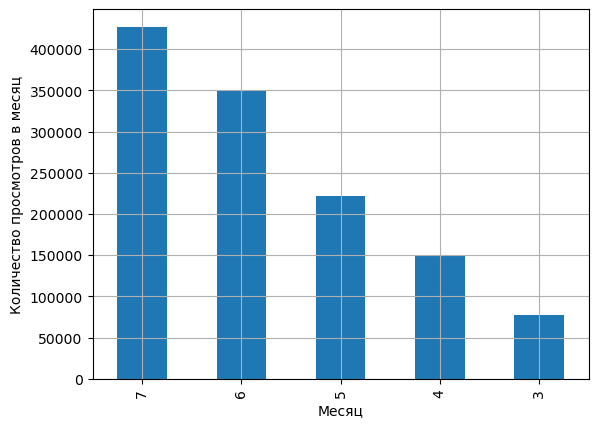

In [41]:
interactions_df['last_watch_dt'].dt.month.value_counts().plot(kind='bar')
plt.xlabel('Месяц')
plt.ylabel('Количество просмотров в месяц')
plt.show()

Видим, что со временем количество просмотров увеличивается, видимо сервис активно развивается.

In [42]:
first_interaction_time = interactions_df['last_watch_dt'].\
                            sort_values().\
                            reset_index(drop=True)[0].strftime('%b %d, %Y')
print('Дата первого просмотра фильма:', first_interaction_time)

Дата первого просмотра фильма: Mar 13, 2021


Это странно, потому что сам **kion** запустился [20 апреля 2021](https://ru.wikipedia.org/wiki/Kion). Судя по информации [отсюда](https://telepedia.fandom.com/ru/wiki/Kion) у **kion** есть партнерство с первым каналом, возможно первый канал поделился историей просмоторов со своего сайта. (["Первый канал" предоставляет "МТС Медиа" права на использование контента из библиотеки игрового и документального кино, а также новые фильмы и сериалы, не выходивших ранее в эфире вещателя](https://https://telepedia.fandom.com/ru/wiki/Kion)). (Может быть и такое, что данные, с которыми мы работаем сильно изменены).


## Feature engineering

### Пользователи

Посчитаем количество просмотренных фильмов.

In [43]:
count_user_interactions_df = pd.DataFrame(interactions_df['user_id'].value_counts()).reset_index()
count_user_interactions_df = count_user_interactions_df.rename(columns={'index':'user_id', 'user_id':'num_watched_films'})
count_user_interactions_df.sample(3)

,user_id,num_watched_films
321660,468367,1
58741,500100,5
110897,660230,3


In [44]:
users_df = users_df.merge(count_user_interactions_df, on='user_id', how='left')
users_df.sample(3)

,user_id,age,income,sex,kids_flg,num_watched_films
37609,250056,age_35_44,income_40_60,М,True,1
242348,882885,age_55_64,income_20_40,М,True,2
148846,687745,age_25_34,income_40_60,Ж,True,2


In [45]:
print('Среднее количество просмотренных фильмов: ', round(users_df['num_watched_films'].mean(), 2))

Среднее количество просмотренных фильмов:  2.72


Посчитаем среднее время просмотра фильма для каждого пользователя.

In [46]:
mean_user_dur_df = \
  pd.DataFrame(interactions_df.groupby('user_id')['total_dur'].mean().reset_index())\
      .rename(columns={'total_dur': 'mean_dur'})
mean_user_dur_df['mean_dur'] = np.round(mean_user_dur_df['mean_dur']).apply(np.int64)
users_df = users_df.merge(mean_user_dur_df, on='user_id', how='left')
users_df.sample(3)

,user_id,age,income,sex,kids_flg,num_watched_films,mean_dur
342572,519150,age_18_24,income_20_40,М,False,2,3414
122245,1068636,age_65_inf,income_20_40,М,False,1,2840
107557,445749,age_45_54,income_20_40,М,False,2,1394


### Фильмы

Посчитаем популярность фильма по просмотрам.

In [47]:
count_items_views_df = interactions_df['item_id']\
                          .value_counts()\
                          .reset_index()\
                          .rename(columns={'index':'item_id', 'item_id': 'views'})
items_df = items_df.merge(count_items_views_df, on='item_id', how='left')

Посчитаем средний процент просмотра для каждого фильма.

In [48]:
mean_pct_items_df = interactions_df[['item_id', 'watched_pct']]\
                          .groupby('item_id', as_index=False)\
                          .mean()
items_df = items_df.merge(mean_pct_items_df, on='item_id', how='left')

Посчитаем средную продолжительность просмотра для каждого фильма.

In [49]:
mean_pct_items_df = interactions_df[['item_id', 'total_dur']]\
                          .groupby('item_id', as_index=False)\
                          .mean()
items_df = items_df.merge(mean_pct_items_df, on='item_id', how='left')

Посчитаем взвешенное среднее между популярностью и процентом просмотра фильмов.

In [50]:
top_items_df['weighted_average_rank'] = top_items_df['interactions'].rank()
top_items_df = top_items_df.drop('interactions', axis=1)
items_df = items_df.merge(top_items_df, on='item_id', how='left')

In [51]:
items_df.rename(columns={'total_dur' : 'mean_total_dur',
                         'watched_pct': 'mean_watched_pct'}, inplace=True)

Посчитаем для каждого фильма популярную возрастную категорию, пол, доход.

In [53]:
for column in ['age', 'sex', 'income']:
  items_top_age_df = interactions_df[['user_id', 'item_id']].merge(users_df[['user_id', column]],
                                                                   on='user_id',
                                                                   how='left')[['item_id', column]]
  items_top_age_df = items_top_age_df.groupby('item_id')[column]\
    .apply(lambda x: x.value_counts().idxmax())\
    .reset_index()

  items_df = items_df.merge(items_top_age_df.rename(columns={column: 'top' + column}),
                            how='left',
                            on='item_id')

In [54]:
items_df.sample(3)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,...,description,keywords,views,mean_watched_pct,mean_total_dur,weighted_average_rank,topage_x,topage_y,topsex,topincome
7297,2365,film,Принцесса,Princesse,2015,комедии,Франция,0,16,NaN,...,Семилетняя Лоиз увидела в витрине магазина чуд...,"2015, франция, принцесса",3,92.333333,627.333333,6073.5,age_35_44,age_35_44,М,income_0_20
7588,2494,film,Манчестер у моря,Manchester by the Sea,2016,драмы,США,0,18,NaN,...,Нелюдимый и погруженный в себя Ли работает сле...,"лодка, печаль, Бостон, Массачусетс, похороны, ...",2,100.000000,19101.000000,5390.5,age_25_34,age_25_34,М,income_40_60
3440,861,film,Проигранное место,Proigrannoe mesto,2018,"ужасы, триллеры, детективы",Россия,0,16,NaN,...,Среди старшеклассников бытует легенда о «проиг...,"2018, россия, проигранное, место",130,64.315385,4707.315385,10799.0,age_25_34,age_25_34,Ж,income_20_40


## Сохранение полученных данных.



In [55]:
featured_data_folder = 'kion_data_featured/'

items_df.to_csv(featured_data_folder + 'items.csv')
users_df.to_csv(featured_data_folder + 'users.csv')
interactions_df.to_csv(featured_data_folder + 'train.csv')